# Comparison of Low-Resolution Cicle3 arxiv

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of Histograms](#2-comparison-of-histograms)

4. [Tropical Mean Comparison](#3-mean-comparison)

5. [The bias between models and observations](#4-calculation-of-a-bias-between-climatological-model-and-observations)

[Go to the end of file](#the-end)

The current and future capabilities of the diagnostic:

|  | Implemented | Nessesety |
| --- | --- | --- |
| Histograms  (counts, frequencies, pdf, etc)| +  | |
| mean (glob, along latitude, longitude and etc) | + |  |
| bias | + |  |
| daily variability | + | ? |
|  95% level | + | ? |
| Corellation of tprate montly variation and total cloud cover, 2t and etc  | - | ? |
| Analyse of convective ranfall distributions (clustering and etc)  | - | ? |
| Stanart deviation map per season  | - | ? |

+ Comparison with GPM-hourly

Ideas for aqua
|  | Implemented | Nessesety |
| --- | --- | --- |
| Perfomance measuents through magic functions| +/-  | ? |
| Precompiling techniques of aqua |  | ? |

#

## 1. The load of packages, modules, and data

In [23]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

##### Loading the low-resolution arxiv 

In [2]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 5000, first_edge = 0, width_of_bin = 1/50, loglevel='warning') #1/24

In [3]:
lumi=True

In [30]:
if lumi:
    reader  = Reader(model="IFS", exp="historical-1990-devcon", source="lra-r100-monthly") 
    ifs_1990_devcon = reader.retrieve(var=["tprate"])
    
    reader                  = Reader(model="IFS", exp="control-1950-devcon", source="lra-r100-monthly")
    control_1950_devcon     = reader.retrieve(var=["tprate"])
else:
    reader  = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="lra-r100-monthly")
    ifs_tco2559_ng5    = reader.retrieve(var=["tprate"])

    reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
    icon_ngc3028    = reader.retrieve(var=["tprate"])

    reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
    ifs_tco1279_orca025     = reader.retrieve(var=["tprate"])
    #ifs_tco1279_orca025 = ifs_tco1279_orca025.dropna(dim='time')
    
reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep_mon               = reader.retrieve(regrid=True, var=["tprate"]) 

reader                  = Reader(model="ERA5", exp="era5", source="monthly", regrid = "r100")
era5_mon                = reader.retrieve(regrid=True, var=["tprate"])
    

2023-10-19 21:58:15 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-10-19 21:58:15 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-10-19 21:58:15 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-10-19 21:58:15 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-10-19 21:58:15 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-10-19 21:58:15 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right
2023-10-19 21:58:27 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-10-19 21:58:27 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-10-19 21:58:27 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-10-19 21:

In [ ]:
mswep_mon_2015_2020 = mswep_mon.sel(time=slice('2015', '2020'))
mswep_mon_1979_1985 = mswep_mon.sel(time=slice('1979', '1985'))

era5_mon_1950_1959 = era5_mon.sel(time=slice('1950', '1959'))
era5_mon_2015_2022 = era5_mon.sel(time=slice('2015', '2022'))

In [31]:
if lumi:
    lra_data = {
                'mswep': {'data': mswep_mon, 'label': 'mswep'},
                'era5': {'data':era5_mon, 'label': 'era5'},
                'historical_1990': {'data': ifs_1990_devcon, 'label': 'historical-1990-devcon'},
                'control_1950': {'data': control_1950_devcon, 'label': 'control-1950-devcon'},            
            }
else:
    lra_data = {
                'mswep': {'data': mswep_mon, 'label': 'mswep'},
                'era5': {'data':era5_mon, 'label': 'era5'},
                'ifs_tco2559': {'data': ifs_tco2559_ng5, 'label': 'ifs_tco2559'},
                'ifs_tco1279': {'data': ifs_tco1279_orca025, 'label': 'ifs_tco1279'},    
                'icon': {'data': icon_ngc3028, 'label': 'icon_ngc3028'},           
            }


In [ ]:
## Apply unit fix always inside the functions

### Initialization of the tropical-rainfall diagnostic

The class attributes are:
- The latitude band of the tropical area: **trop_lat=15**     
    
- The number of bins in the histogram: **num_of_bins=20**
    
- The left edge of the first bin: **first_edge=0** 
    
- The width of each bin: **width_of_bin**     
    

In [4]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 1000, first_edge = 0, width_of_bin = 1, loglevel='warning') #1/24

In [33]:
diag.seasonal_095level_into_netcdf(lra_data['mswep']['data'], new_unit='mm/day') #, path_to_pdf=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly_095level")

TypeError: Tropical_Rainfall.seasonal_095level_into_netcdf() got an unexpected keyword argument 'new_unit'

In [ ]:
diag.seasonal_095level_into_netcdf(icon_ngc3028, path_to_pdf=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly_095level")

In [ ]:
diag.get_95percent_level(icon_ngc3028)

In [4]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5, path_to_histogram='./', name_of_file="test")


2023-09-27 17:17:21 :: create_folder :: WARNING  -> Folder ./ already exists


In [6]:
diag.dataset_to_netcdf(hist_ifs_tco2559_ng5_1, path_to_netcdf='.', name_of_file='test')

2023-09-27 20:48:51 :: create_folder :: WARNING  -> Folder . already exists


'.trop_rainfall_test_2020-11-15T00.nc'

## 2. Comparison of histograms

##### All output of the diagnostic is in the format of NetCDF or PDF.
##### The paths to the repositories, where the diagnostic store the output, are 

In [ ]:
# Please change the path to the NetCDF files and the PDF files to your own path

path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/"
path_to_mean = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/mean/"
path_to_pdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/"

#### The function `histogram` calculates and stores the histograms in a specified repository. 

In [ ]:
hist_icon_ngc3028 = diag.histogram(icon_ngc3028, path_to_histogram=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly_mm_per_d")

In [ ]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly_mm_per_d")


In [ ]:
hist_ifs_tco1279_orca025 = diag.histogram(ifs_tco1279_orca025, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco1279_orca025_lra_r100_monthly_mm_per_d")

In [ ]:
hist_mswep_mon = diag.histogram(mswep_mon, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_monthly_r100_mm_per_d")

In [ ]:
hist_mswep_mon_2015_2020 = diag.histogram(mswep_mon_2015_2020, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_monthly_2015_2020_r100_mm_per_d")
hist_mswep_mon_1979_1985 = diag.histogram(mswep_mon_1979_1985, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_monthly_1979_1985_r100_mm_per_d")

In [ ]:
hist_era5_1950_1959 = diag.histogram(era5_mon_1950_1959, path_to_histogram=path_to_netcdf, name_of_file="era5_mon_1950_1959_r100_mm_per_d")
hist_era5_2015_2022 = diag.histogram(era5_mon_2015_2022, path_to_histogram=path_to_netcdf, name_of_file="era5_mon_2015_2022_r100_mm_per_d")

##### The diagnostic can provide us with a graphical comparison of the obtained histograms.  
##### Below we compare the precipitation pdf with the units `mm/day`. Units of precipitation: mm  day**-1

In [ ]:
sum(hist_icon_ngc3028.pdfP[0:]* hist_icon_ngc3028.width[0:])


In [ ]:

path_to_netcdf='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/'
hist_icon_ngc3028 = diag.open_dataset(path_to_netcdf+'trop_rainfall_icon_ngc3028_lra_r100_monthly_mm_per_d_2020-01-21T00_2025-07-01T00_histogram.nc')
hist_ifs_tco2559_ng5 = diag.open_dataset(path_to_netcdf+'trop_rainfall_ifs_tco2559_ng5_lra_r100_monthly_mm_per_d_2020-01-15T00_2024-12-15T00_histogram.nc')
hist_ifs_tco1279_orca025 = diag.open_dataset(path_to_netcdf+'trop_rainfall_ifs_tco1279_orca025_lra_r100_monthly_mm_per_d_2020-01-15T00_2024-12-15T00_histogram.nc')

#hist_ifs_control_1950 = diag.open_dataset(path_to_netcdf+'IFS/control_1950_devcon/trop_rainfall_control_1950_devcon_lra_r100_monthly_1950-01-01T00_1959-12-01T00_histogram.nc')
#hist_ifs_historical_1990 = diag.open_dataset(path_to_netcdf+'IFS/historical_1990_devcon/trop_rainfall_historical_1990_devcon_lra_r100_monthly_1990-01-01T00_1990-12-01T00_histogram.nc')

hist_mswep_mon =  diag.open_dataset(path_to_netcdf+'trop_rainfall_mswep_past_monthly_r100_mm_per_d_1979-02-01T00_2020-11-01T00_histogram.nc')
hist_mswep_mon_1979_1985 =  diag.open_dataset(path_to_netcdf+'trop_rainfall_mswep_past_monthly_1979_1985_r100_mm_per_d_1979-02-01T00_1985-12-01T00_histogram.nc')
hist_mswep_mon_2015_2020 =  diag.open_dataset(path_to_netcdf+'trop_rainfall_mswep_past_monthly_2015_2020_r100_mm_per_d_2015-01-01T00_2020-11-01T00_histogram.nc')

hist_era5_1950_1959 =  diag.open_dataset(path_to_netcdf+'trop_rainfall_era5_mon_1950_1959_r100_mm_per_d_1950-01-01T00_1959-12-01T00_histogram.nc')
hist_era5_2015_2022 = diag.open_dataset(path_to_netcdf+'trop_rainfall_era5_mon_2015_2022_r100_mm_per_d_2015-01-01T00_2022-12-01T00_histogram.nc')


In [ ]:
""" 
path_to_netcdf='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/'
hist_icon_ngc3028 = diag.open_dataset(path_to_netcdf+'ICON/PT3H/trop_rainfall_icon_ngc3028_lra_r100_monthly_2020-01-21T00_2025-07-01T00_histogram.nc')
hist_ifs_tco2559_ng5 = diag.open_dataset(path_to_netcdf+'IFS/tco2559-ng5-cycle3/trop_rainfall_ifs_tco2559_ng5_lra_r100_monthly_2020-01-15T00_2024-12-15T00_histogram.nc')
hist_ifs_tco1279_orca025 = diag.open_dataset(path_to_netcdf+'IFS/tco1279-orca025-cycle3/trop_rainfall_ifs_tco1279_orca025_cycle3_lra_r100_monthly_2020-01-15T00_2024-12-15T00_histogram.nc')

hist_ifs_control_1950 = diag.open_dataset(path_to_netcdf+'IFS/control_1950_devcon/trop_rainfall_control_1950_devcon_lra_r100_monthly_1950-01-01T00_1959-12-01T00_histogram.nc')
hist_ifs_historical_1990 = diag.open_dataset(path_to_netcdf+'IFS/historical_1990_devcon/trop_rainfall_historical_1990_devcon_lra_r100_monthly_1990-01-01T00_1990-12-01T00_histogram.nc')

hist_mswep_mon =  diag.open_dataset(path_to_netcdf+'MSWEP/trop_rainfall_mswep_monthly_r100_1979-02-01T00_2020-11-01T00_histogram.nc')
hist_mswep_mon_1979_1985 =  diag.open_dataset(path_to_netcdf+'MSWEP/trop_rainfall_mswep_past_monthly_1979_1985_r100_1979-02-01T00_1985-12-01T00_histogram.nc')
hist_mswep_mon_2015_2020 =  diag.open_dataset(path_to_netcdf+'MSWEP/trop_rainfall_mswep_past_monthly_2015_2020_r100_2015-01-01T00_2020-11-01T00_histogram.nc')

hist_era5_1950_1959 =  diag.open_dataset(path_to_netcdf+'ERA5/trop_rainfall_era5_mon_1950_1959_r100_1950-01-01T00_1959-12-01T00_histogram.nc')
hist_era5_2015_2022 = diag.open_dataset(path_to_netcdf+'ERA5/trop_rainfall_era5_mon_2015_2022_r100_2015-01-01T00_2022-12-01T00_histogram.nc')

"""


In [ ]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=1, pdfP = True, pdf=False, 
                new_unit="mm/hr", 
                xlogscale=True, ylogscale=False,
                legend='ICON ngc3028 (2020-2025)')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:orange', pdfP = True, pdf=False, 
                new_unit="mm/hr", 
                xlogscale=True, ylogscale=False,
                legend='IFS tco2559-ng5 (2020-2024)') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:red', pdfP = True, pdf=False, 
                new_unit="mm/hr", 
                xlogscale=True, ylogscale=False,
                legend='IFS tco1279-orca025 (2020-2024)')
#diag.histogram_plot(hist_ifs_control_1950,   add = add,  color ='tab:green', pdfP = True, pdf=False, 
#                new_unit="mm/hr", xlogscale=True, ylogscale=False,
#                legend='IFS control (1950-1959)') 
diag.histogram_plot(hist_era5_1950_1959,             add = add,  color ='grey', pdfP = True, pdf=False, 
                xlogscale=True, ylogscale=False,
                new_unit="mm/hr",
                legend='ERA5 (1950-1959)', xmax = 70) #,
diag.histogram_plot(hist_mswep_mon_2015_2020,             add = add,  color ='k', pdfP = True, pdf=False, 
                xlogscale=True, ylogscale=False,
                new_unit="mm/hr",
                legend='MSWEP (2015-2020)', xmax = 70, 
                plot_title='Monthly, 1 degree res (100km)', loc='upper left')
                #path_to_pdf=path_to_pdf, 
                #pdf_format=True, 
                #name_of_file='lra_r100_monthly_comparison') #,

In [ ]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=1, pdfP = True, pdf=False, 
                new_unit="mm/hr", xlogscale=True, ylogscale=False,
                legend='ICON, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', pdfP = True, pdf=False, 
                new_unit="mm/hr", xlogscale=True, ylogscale=False,
                legend='IFS, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', pdfP = True, pdf=False,
                new_unit="mm/hr", xlogscale=True, ylogscale=False,
                legend='IFS, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', pdfP = True, pdf=False, 
                new_unit="mm/hr", xlogscale=True, ylogscale=False,
                legend='MSWEP', xmax = 70, 
                plot_title='Monthly, 1 degree res (100km)', loc='upper left')
                #path_to_pdf=path_to_pdf, 
                #pdf_format=False, 
                #name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison')

## 3. Mean comparison

##### The diagnostic can also give us a graphical comparison of the mean value along different coordinates. 

For example, the function `plot_of_average()` calculates the mean value of precipitation during 
 - December-January-February (`DJF`), 
 - March-April-May (`MAM`), 
 - June-July-August (`JJA`), 
 - September-October-November (`SON`), and 
- for the total period of time. 

Then the function  `average_into_netcdf(coord='lon')` calculates the mean value of precipitation along the longitude. 

In the end, the mean values of precipitation for each value of latitude in millimeters per day are:

In [ ]:
diag.s_month, diag.f_month = None, None
diag.average_into_netcdf(ifs_tco1279_orca025, coord='lon', trop_lat=90,
                         path_to_netcdf=path_to_mean,  name_of_file='ifs_tco1279_orca025_lra')
diag.s_month, diag.f_month = None, None
diag.average_into_netcdf(ifs_tco1279_orca025, coord='lat', trop_lat=15,
                         path_to_netcdf=path_to_mean,  name_of_file='ifs_tco1279_orca025_lra')

In [ ]:
diag.s_month, diag.f_month = None, None
diag.average_into_netcdf(icon_ngc3028, coord='lon', trop_lat=90,
                         path_to_netcdf=path_to_mean,  name_of_file='icon_ngc3028_lra')
diag.s_month, diag.f_month = None, None
diag.average_into_netcdf(icon_ngc3028, coord='lat', trop_lat=15,
                         path_to_netcdf=path_to_mean,  name_of_file='icon_ngc3028_lra')

In [ ]:
diag.s_month, diag.f_month = None, None
diag.average_into_netcdf(ifs_tco2559_ng5, coord='lon', trop_lat=90,
                         path_to_netcdf=path_to_mean,  name_of_file='ifs_tco2559_ng5_lra')
diag.s_month, diag.f_month = None, None
diag.average_into_netcdf(ifs_tco2559_ng5, coord='lat', trop_lat=15,
                         path_to_netcdf=path_to_mean,  name_of_file='ifs_tco2559_ng5_lra')

In [ ]:
diag.s_month, diag.f_month = None, None
diag.average_into_netcdf(mswep_mon, coord='lon', trop_lat=90,
                         path_to_netcdf=path_to_mean,  name_of_file='mswep_mon_lra')
diag.s_month, diag.f_month = None, None
diag.average_into_netcdf(mswep_mon, coord='lat', trop_lat=15,
                         path_to_netcdf=path_to_mean,  name_of_file='mswep_mon_lra')

In [ ]:
diag.trop_lat=90
add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_icon_ngc3028_lra_lon_2020-09-01T00_2024-11-01T00_histogram.nc",                  
                                legend='ICON, ngc3028',         color='tab:blue', figsize=0.9)

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_ifs_tco2559_ng5_lra_lon_2020-09-15T00_2024-11-15T00_histogram.nc",    
                                fig=add,    
                                legend='IFS, tco2559-ng5',      color='tab:red')

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_ifs_tco1279_orca025_lra_lon_2020-09-15T00_2024-11-15T00_histogram.nc", 
                                fig=add,    
                                legend='IFS, tco1279-orca025',  color='tab:orange')

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_mswep_mon_lra_lon_1979-09-01T00_2020-11-01T00_histogram.nc",          
                                fig=add,   
                                legend='MSWEP',                 color='tab:green',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper left',
                                path_to_pdf=path_to_pdf,
                                pdf_format=False,
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lon')

In [ ]:
diag.trop_lat=15
add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_icon_ngc3028_lra_lat_2020-09-01T00_2024-11-01T00_histogram.nc",                  
                                legend='ICON, ngc3028',         color='tab:blue', figsize=0.9)

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_ifs_tco2559_ng5_lra_lat_2020-09-15T00_2024-11-15T00_histogram.nc",    
                                fig=add,    
                                legend='IFS, tco2559-ng5',      color='tab:red')

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_ifs_tco1279_orca025_lra_lat_2020-09-15T00_2024-11-15T00_histogram.nc", 
                                fig=add,    
                                legend='IFS, tco1279-orca025',  color='tab:orange')

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_mswep_mon_lra_lat_1979-09-01T00_2020-11-01T00_histogram.nc",          
                                fig=add,   
                                legend='MSWEP',                 color='tab:green',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper left',
                                path_to_pdf=path_to_pdf,
                                pdf_format=False,
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lat')

## 4. Calculation of a bias between climatological model and observations

Tropical-rainfall diagnostic provides the graphical representation of the bias between the mean value of precipitation of the climatological model and the mean value of observations. 

The mean value the function calculates for each season (`DJF`, `MAM`, `JJA`, `SON`) and for the total period of time. 

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


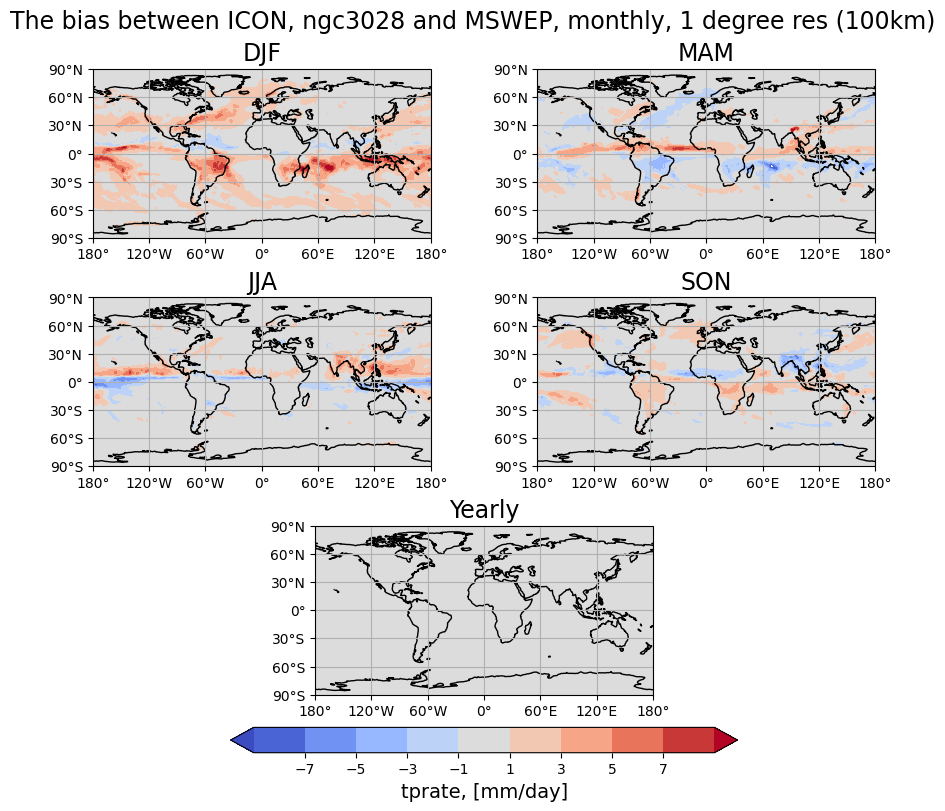

In [14]:
diag.plot_seasons_or_months(data, seasons=True, new_unit='mm/day', figsize=0.8, trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between ICON, ngc3028 and MSWEP, monthly, 1 degree res (100km)')

In [ ]:
diag.plot_seasons_or_months(icon_ngc3028, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between ICON, ngc3028 and MSWEP, monthly, 1 degree res (100km)')
               #path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_mswep_lra_r100_monthly_bias')

In [ ]:
diag.plot_bias(icon_ngc3028, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between ICON, ngc3028 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_mswep_lra_r100_monthly_bias')

In [ ]:
diag.plot_bias(ifs_tco1279_orca025, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between IFS, tco1279-orca0258 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='ifs_tco1279_orca0258_mswep_lra_r100_monthly_bias')

In [ ]:
diag.plot_bias(ifs_tco2559_ng5, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between IFS, tco2559-ng5 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='tco2559-ng5_mswep_lra_r100_monthly_bias')

#

## Below is the comparison of high-frequency histograms.

In [ ]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = int(1000/1), first_edge = 0, width_of_bin = 1, loglevel='debug')

In [ ]:
path_to_ifs='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/tco2559-ng5-cycle3/'
hist_ifs_2559_high = diag.merge_list_of_histograms(path_to_histograms = path_to_ifs, multi = None, seasons = False, all = True)

In [ ]:
path_to_ifs_orca='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/tco1279-orca025-cycle3/'
hist_ifs_tco1279_high = diag.merge_list_of_histograms(path_to_histograms = path_to_ifs_orca, multi = None, seasons = False, all = True)

In [ ]:
path_to_icon='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/PT3H/'
hist_icon_ngc3028_high = diag.merge_list_of_histograms(path_to_histograms = path_to_icon, multi = None,  all = True)

In [ ]:
path_to_mswep='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/mswep_no_fix/'
hist_mswep_high = diag.merge_list_of_histograms(path_to_histograms = path_to_mswep, multi = None,  all = True)

In [ ]:
for hist in [hist_ifs_2559_high, hist_ifs_tco1279_high, hist_icon_ngc3028_high, hist_mswep_high]:
    if abs(hist.pdf.sum() -1) < 10**(-4) and  abs(hist.frequency.sum() -1) < 10**(-4):
        print('OK')

In [ ]:
add = diag.histogram_plot(hist_icon_ngc3028_high,   pdf=True,   figsize=1,                         
                legend='ICON, ngc3028')
add = diag.histogram_plot(hist_ifs_tco1279_high.pdf,    pdf=False, frequency=False,   add = add,  color ='tab:orange', 
                legend='IFS, tco1279-orca025') 
add = diag.histogram_plot(hist_ifs_2559_high,       pdf=True,   add = add,  color ='tab:red', 
                legend='IFS, tco2559-ng5') 
add = diag.histogram_plot(hist_mswep_high,          pdf=True,   add = add,  color ='tab:green', 
                legend='MSWEP',  
                plot_title='3hourly, 0.1 degree res (10km)', loc='upper right',
                path_to_pdf=path_to_pdf, 
                pdf_format=False,  
                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_10km_3h')

##### The end